In [1]:
from spso2006DNF import SpsoDNF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [19]:
constantParamsDict =  dict(size=49,dt=0.1,dim=2,model='spike',activation='step',lateral="step",wrap=False)



In [20]:
listParam = ["iExc","iInh","wExc","wInh","h"]
bounds = (np.array([0,0,1e-3,1e-3,-1.0]), np.array([5,1,1,1,0]))

In [21]:
def transformIndiv(indiv):
    """return the parameters dictionary which will be given to the model""" 
    # listGen = ["iExc","ik = iInh/iExc","wK=wExc/wInh","wInh","th"
    paramList = [0] * len(indiv)
    paramList[0] = indiv[0]
    paramList[1] = indiv[1]*indiv[0]
    paramList[2] = indiv[2]*indiv[3]
    paramList[3] = indiv[3]
    paramList[4] = indiv[4]
    
    return paramList


In [22]:
scenario = "WorkingMemoryShift"
stats = "StatsTemplate"
model = "ModelDNF"
evaluationParamsDict = dict(timeEnd=40,allowedTime=10e10)

In [23]:
nbRepet = 1
nbEvaluationMax = 100
n=20
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(evaluationParamsDict=evaluationParamsDict,constantParamsDict=constantParamsDict,n=n,k=k,
                  nbEvaluationMax=nbEvaluationMax,nbThread=8,verbose=1,
                 transformIndiv=transformIndiv,listParam=listParam,bounds=bounds,
                  scenarioName=scenario,statsName=stats,modelName=model)
    pso.reset()
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['iExc'],x['iInh'],x['wExc'],x['wInh'],x['h']])
        
        

0
1:1.8663798512773953:{'dim': 2, 'dt': 0.1, 'iExc': 4.0921339105377434, 'wrap': False, 'wExc': 0.26360522593564378, 'model': 'spike', 'size': 49, 'lateral': 'step', 'activation': 'step', 'iInh': 1.5914795922722915, 'h': -0.23390554783721729, 'wInh': 0.50734612516494959}
2:1.8663798512773953:{'dim': 2, 'dt': 0.1, 'iExc': 4.0921339105377434, 'wrap': False, 'wExc': 0.26360522593564378, 'model': 'spike', 'size': 49, 'lateral': 'step', 'activation': 'step', 'iInh': 1.5914795922722915, 'h': -0.23390554783721729, 'wInh': 0.50734612516494959}
3:1.8663798512773953:{'dim': 2, 'dt': 0.1, 'iExc': 4.0921339105377434, 'wrap': False, 'wExc': 0.26360522593564378, 'model': 'spike', 'size': 49, 'lateral': 'step', 'activation': 'step', 'iInh': 1.5914795922722915, 'h': -0.23390554783721729, 'wInh': 0.50734612516494959}
4:1.8663798512773953:{'dim': 2, 'dt': 0.1, 'iExc': 4.0921339105377434, 'wrap': False, 'wExc': 0.26360522593564378, 'model': 'spike', 'size': 49, 'lateral': 'step', 'activation': 'step', 'i

In [8]:
df = pd.DataFrame(data_k_i,columns=['n','k','i','epoch','fit','topo','iExc','iInh','wExc','wInh','h'])
df.head()


  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/core/mapND.py", line 138, in update
    child.update(simuTime)
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/core/mapND.py", line 141, in update
    self._computationStep()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/core/mapND.py", line 121, in _computationStep
    self._compute_with_params()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/core/computable.py", line 111, in _compute_with_params
    self._compute(**args)
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/model/convolutionND.py", line 23, in _compute
    self._data = cv2.filter2D(source,-1,cv2.flip(kernel,-1),anchor=(-1,-1),borderType=border)
KeyboardInterrupt


,n,k,i,epoch,fit,topo,iExc,iInh,wExc,wInh,h
0,20,3,0,0,1.0505579988739848,False,3.896102,1.805198,0.539986,0.726776,-0.013551
1,20,3,0,1,1.0494741050327483,False,3.241271,0.515301,0.256340,0.413807,-0.011016
2,20,3,0,2,1.0461216756721685,False,4.337469,0.541994,0.173510,0.419063,0.000000
3,20,3,0,3,1.0461216756721685,True,4.337469,0.541994,0.173510,0.419063,0.000000
4,20,3,0,4,1.0223098956945198,False,4.898392,0.607263,0.091959,0.254866,-0.085080


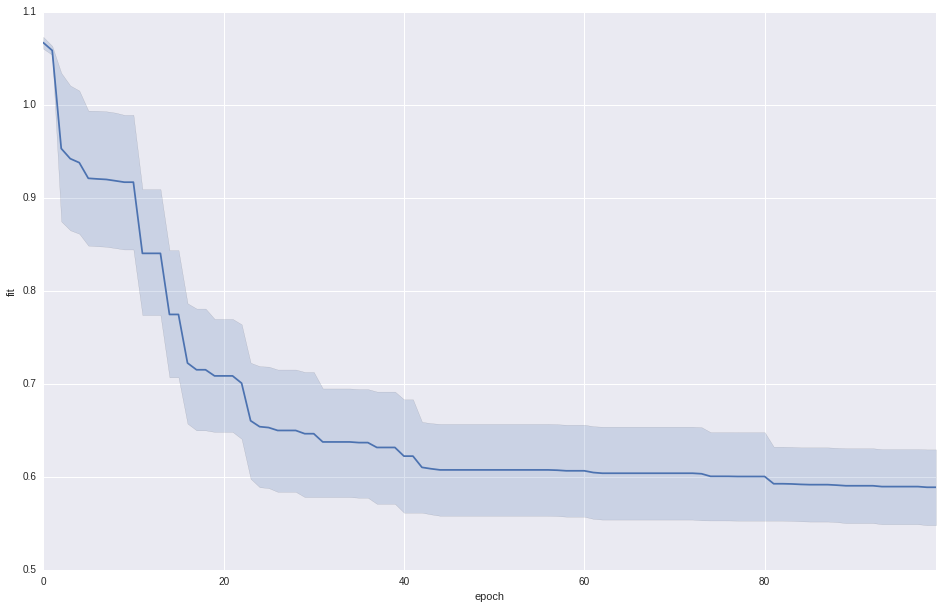

In [9]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='fit',unit='i',data=df)


# WMshift DoE kernel

In [111]:
constantParamsDict =  dict(size=49,dt=0.1,dim=2,model='spike',activation='step',lateral="dog",wrap=False)
listParam = ["iExc","iInh","wExc","wInh"]
bounds = (np.array([0,0,1e-3,1e-3]), np.array([5,1,1,1]))

In [112]:
scenario = "WorkingMemoryShift"
stats = "StatsTemplate"
model = "ModelDNF"
evaluationParamsDict = dict(timeEnd=30,allowedTime=10e10)

In [114]:
nbRepet = 1
nbEvaluationMax = 100
n=20
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(evaluationParamsDict=evaluationParamsDict,constantParamsDict=constantParamsDict,n=n,k=k,
                  nbEvaluationMax=nbEvaluationMax,nbThread=8,verbose=1,
                 transformIndiv=transformIndiv,listParam=listParam,bounds=bounds,
                  scenarioName=scenario,statsName=stats,modelName=model)
    pso.reset()
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['iExc'],x['iInh'],x['wExc'],x['wInh']])

0
1:0.6047741048896824:{'wExc': 0.073568139639931057, 'iExc': 3.3634770620472927, 'activation': 'step', 'wInh': 0.27940952826681598, 'dim': 2, 'model': 'spike', 'lateral': 'dog', 'iInh': 1.7300716937180849, 'wrap': False, 'dt': 0.1, 'size': 49}
2:0.6047741048896824:{'wExc': 0.073568139639931057, 'iExc': 3.3634770620472927, 'activation': 'step', 'wInh': 0.27940952826681598, 'dim': 2, 'model': 'spike', 'lateral': 'dog', 'iInh': 1.7300716937180849, 'wrap': False, 'dt': 0.1, 'size': 49}
3:0.6047741048896824:{'wExc': 0.073568139639931057, 'iExc': 3.3634770620472927, 'activation': 'step', 'wInh': 0.27940952826681598, 'dim': 2, 'model': 'spike', 'lateral': 'dog', 'iInh': 1.7300716937180849, 'wrap': False, 'dt': 0.1, 'size': 49}
4:0.6022641492932814:{'wExc': 0.045635173333178007, 'iExc': 4.0337371217709617, 'activation': 'step', 'wInh': 0.4361978456622212, 'dim': 2, 'model': 'spike', 'lateral': 'dog', 'iInh': 1.0778551706746846, 'wrap': False, 'dt': 0.1, 'size': 49}
5:0.597132178323159:{'wExc'

In [64]:
summary = pso.epochSummary
bestX = summary['bestX']

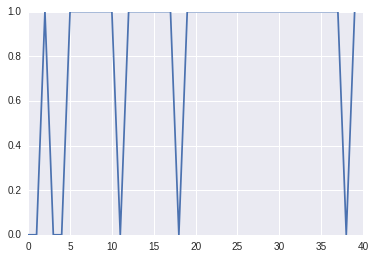

In [65]:
plt.plot(topo)

In [66]:
log = pso.log
print(len(log['f']))

40


In [67]:
f = np.array(log['f'])
p = np.array(log['p'])
x = np.array(log['x'])
v = np.array(log['v'])

fp = np.array(log['fp'])

l = np.array(log['l'])


lp = np.zeros_like(x)
for i in range(len(log['f'])):
    for j in range(20):
        lp[i,j,:] = p[i,l[i,j],:]

0.0450605909059


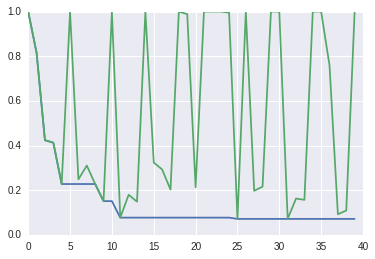

In [68]:
indiv = 10
plt.plot(fp[:,indiv])
plt.plot(f[:,indiv])
print(np.min(fp))

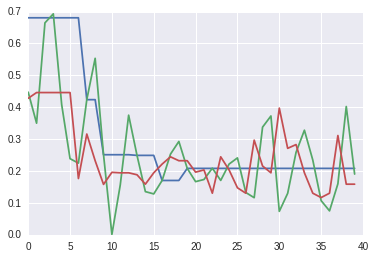

In [69]:
indiv = 1
dim = 3
plt.plot(p[:,indiv,dim])
plt.plot(x[:,indiv,dim])
plt.plot(lp[:,indiv,dim])


# Test landscape

In [52]:
# pso = SpsoDNF(constantParamsDict=constantParamsDict,n=20,k=3,nbEvaluationMax=100,nbThread=1,verbose=1,
#                  transformIndiv=transformIndiv,listParam=listParam,bounds=bounds)

In [101]:


iE_range = np.linspace(bounds[0][0],bounds[1][0],100)
ik_range = np.linspace(bounds[0][1],bounds[1][1],100)
wk_range = np.linspace(bounds[0][2],bounds[1][2],100)
wI_range = np.linspace(bounds[0][3],bounds[1][3],100)

In [97]:
def params():
    X = {'wExc': 0.045443252813000351, 'iExc': 1.3553446712914161, 'activation': 'step', 'wInh': 0.16691227504420655, 'dim': 2, 'model': 'spike', 'lateral': 'step', 'iInh': 0.048652003699815226, 'wrap': False, 'dt': 0.1, 'size': 49}
    iExc,iInh,wExc,wInh = X['iExc'],X['iInh'],X['wExc'],X['wInh']
    ik = iInh/iExc
    wk = wExc/wInh
    return [iExc,ik,wk,wInh]

In [102]:
# [iExc,ik,wk,wInh] = params()
# wk_f = []
# for wk in  wk_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     wk_f.append(fitness)
    
# [iExc,ik,wk,wInh] = params()
# ik_f = []
# for ik in  ik_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     ik_f.append(fitness)

        
# [iExc,ik,wk,wInh] = params()
# ie_f = []
# for iExc in  iE_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     ie_f.append(fitness)
    
[iExc,ik,wk,wInh] = params()
wi_f = []
for wInh in wI_range:
    fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
    wi_f.append(fitness)

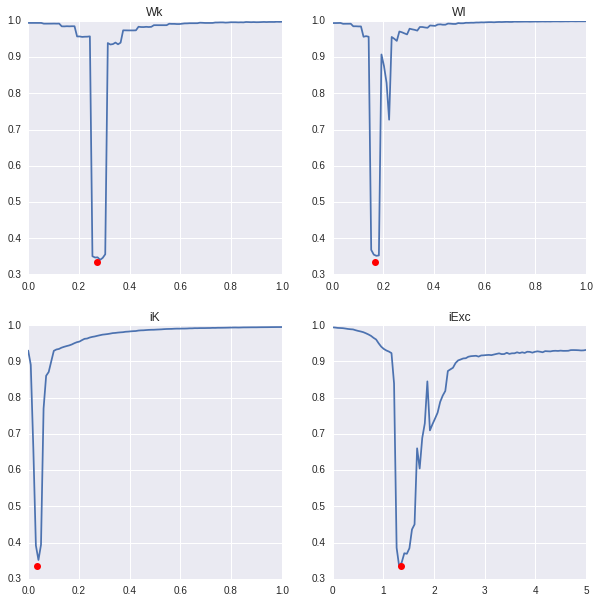

In [107]:
[iExc,ik,wk,wInh] = params()
fit = 0.3355789209247651

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(wk_range,wk_f)
plt.plot(wk,fit,'or')
plt.title("Wk")
plt.subplot(222)
plt.plot(wI_range,wi_f)
plt.plot(wInh,fit,'or')
plt.title("WI")
plt.subplot(223)
plt.plot(ik_range,ik_f)
plt.plot(ik,fit,'or')
plt.title("iK")
plt.subplot(224)
plt.plot(iE_range,ie_f)
plt.plot(iExc,fit,'or')
plt.title("iExc")